# Most common programming languages used in India?

This project (Write a Data Science Blog Post) is part of Udacity Data Scientists (Nanodegree Program). I have used Stackoverflow’s 2018 and 2019 Annual Developer Survey data for this analysis to find the most common used programming languages in India.

<img src='https://www.pcquest.com/wp-content/uploads/2016/12/programming-languages.jpg'></img>

## Introduction

With the rise of emerging technology in India such as Artificial Intelligence and Data Science, many programming languages like Python and R have gained popularity. Java and C++ were mostly used earlier. 

In this article, we are going to analyze real data to verify if these programming languages are really being used in India or if they are just rumors.

For this, I will be using data from Stackoverflow’s 2018 and 2019 Annual Developer Survey.

As the world’s largest and most trusted community of software developers, stackoverflow runs this survey and share these results to improve developers’ lives. The website wants to empower developers by providing them with rich information about themselves, their industry, and their peers.
I used data from Stackoverflow ’s Annual Developer Surveys of year 2018 and 2019. The surveys data covers lot of features of developers , including 'Country',’age’,’IT/Programming experience’,’industry’,’size of company’,’occupation’,’languages’,’salary’.

Every year, Stack Overflow conducts a massive survey of people on the site, covering all sorts of information like programming languages, jobs, code style and various other information.

Motivation behind this project includes answer to following questions:

**1)What are most used programming languages in India?** <br>
**2)Do you program as a hobby or contribute to open source projects?** <br>
**3)What are most demanding programming language in India?** <br>
**4)Which occupations were most popular in each year?** <br>

In [1]:
# Importing necesaary libraries
import numpy as np
import pandas as pd
from collections import Counter

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

# Librariries for visulization
import matplotlib.pyplot as plt
import seaborn as sns

# to ignore warnings
import warnings

In [2]:
# Reading Stackoverflow survey data
df_2018 = pd.read_csv('C:/Users/LENOVO/Downloads/Project 4/survey_results_public_18.csv')
df_2019 = pd.read_csv('C:/Users/LENOVO/Downloads/Project 4/survey_results_public_19.csv')

C:\Users\LENOVO\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Sample 2018 Data (first 5 rows)
df_2018.head(5)

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,JobContactPriorities3,JobContactPriorities4,JobContactPriorities5,JobEmailPriorities1,JobEmailPriorities2,JobEmailPriorities3,JobEmailPriorities4,JobEmailPriorities5,JobEmailPriorities6,JobEmailPriorities7,UpdateCV,Currency,Salary,SalaryType,ConvertedSalary,CurrencySymbol,CommunicationTools,TimeFullyProductive,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,HackathonReasons,AgreeDisagree1,AgreeDisagree2,AgreeDisagree3,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,FrameworkWorkedWith,FrameworkDesireNextYear,IDE,OperatingSystem,NumberMonitors,Methodology,VersionControl,CheckInCode,AdBlocker,AdBlockerDisable,AdBlockerReasons,AdsAgreeDisagree1,AdsAgreeDisagree2,AdsAgreeDisagree3,AdsActions,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Extremely satisfied,Extremely satisfied,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,10.0,7.0,8.0,1.0,2.0,5.0,3.0,4.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,4.0,2.0,5.0,5.0,6.0,7.0,2.0,1.0,4.0,3.0,My job status or other personal status changed,NaN,NaN,Monthly,NaN,KES,Slack,One to three months,"Taught yourself a new language, framework, or ...",The official documentation and/or standards fo...,NaN,To build my professional network,Strongly agree,Strongly agree,Neither Agree nor Disagree,JavaScript;Python;HTML;CSS,JavaScript;Python;HTML;CSS,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...,AWS;Azure;Linux;Firebase,AWS;Azure;Linux;Firebase,Django;React,Django;React,Komodo;Vim;Visual Studio Code,Linux-based,1,Agile;Scrum,Git,Multiple times per day,Yes,No,NaN,Strongly agree,Strongly agree,Strongly agree,Saw an online advertisement and then researche...,1.0,5.0,4.0,7.0,2.0,6.0,3.0,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,No,"Yes, and publicly",Upper management at the company/organization,Yes,10 (Very Likely),Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a jobs boar...",Yes,NaN,Yes,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Between 5:00 - 6:00 AM,9 - 12 hours,1 - 2 hours,Never,Standing desk,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,Unite

In [4]:
# Data Understanding
def display_bar_chart(df, column, title):
    '''
    
    Displays a bar chart with a title
    
    Parameters:
    df: a dataframe
    column: the column which we want to show
    title: the title of the chart
    
    Returns:
    None
    
    '''
    status_vals = df[column].value_counts()
    (status_vals[:10]/df.shape[0]).plot(kind="bar");
    plt.title(title);

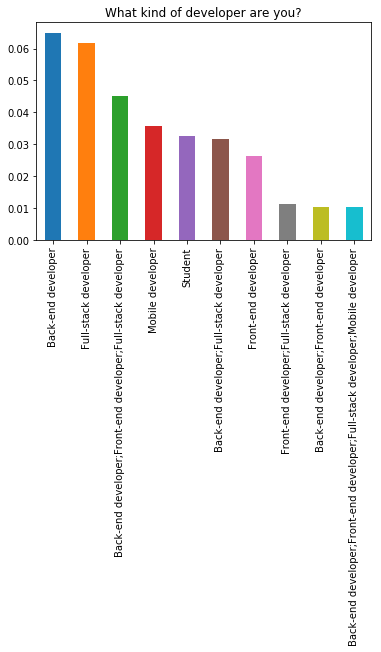

In [6]:
#Provide a pandas series of the counts for each Professional status for 2018
display_bar_chart(df_2018, "DevType", "What kind of developer are you?")

In [7]:
# Sample 2019 Data (first 5 rows)
df_2019.head(5)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,UnitTests,PurchaseHow,PurchaseWhat,LanguageWorkedWith,LanguageDesireNextYear,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HTML/CSS;Java;JavaScript;Python,C;C++;C#;Go;HTML/CSS;Java;JavaScript;Python;SQL,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C++;HTML/CSS;Python,C++;HTML/CSS;JavaScript;SQL,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technolo

In [8]:
for i in df_2019.columns:
    print(i)

Respondent
MainBranch
Hobbyist
OpenSourcer
OpenSource
Employment
Country
Student
EdLevel
UndergradMajor
EduOther
OrgSize
DevType
YearsCode
Age1stCode
YearsCodePro
CareerSat
JobSat
MgrIdiot
MgrMoney
MgrWant
JobSeek
LastHireDate
LastInt
FizzBuzz
JobFactors
ResumeUpdate
CurrencySymbol
CurrencyDesc
CompTotal
CompFreq
ConvertedComp
WorkWeekHrs
WorkPlan
WorkChallenge
WorkRemote
WorkLoc
ImpSyn
CodeRev
CodeRevHrs
UnitTests
PurchaseHow
PurchaseWhat
LanguageWorkedWith
LanguageDesireNextYear
DatabaseWorkedWith
DatabaseDesireNextYear
PlatformWorkedWith
PlatformDesireNextYear
WebFrameWorkedWith
WebFrameDesireNextYear
MiscTechWorkedWith
MiscTechDesireNextYear
DevEnviron
OpSys
Containers
BlockchainOrg
BlockchainIs
BetterLife
ITperson
OffOn
SocialMedia
Extraversion
ScreenName
SOVisit1st
SOVisitFreq
SOVisitTo
SOFindAnswer
SOTimeSaved
SOHowMuchTime
SOAccount
SOPartFreq
SOJobs
EntTeams
SOComm
WelcomeChange
SONewContent
Age
Gender
Trans
Sexuality
Ethnicity
Dependents
SurveyLength
SurveyEase


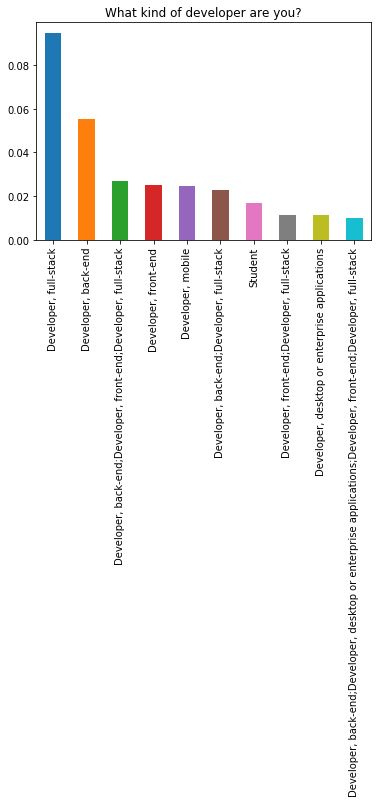

In [10]:
#Provide a pandas series of the counts for each Professional status for 2019
display_bar_chart(df_2019, "DevType", "What kind of developer are you?")

## 1. What programming languages are mostly used and which programming languages are most required?

In [11]:
### Function to filter India data and relevent columns
def filter_country(df, column_filter, country, columns):
    ''' Filter a dataframe by country.,
        returns filtred dataframe.
    '''
    
    df_copy = df
    
    for column in columns: 
        df_copy = df_copy[df_copy[column_filter] == country].dropna(subset=[column])
        
    return df_copy

# Filter the dataframe by India and selecting some columns.
India_2018 = filter_country(df_2018, 'Country', 'India', ['LanguageWorkedWith', 'LanguageDesireNextYear'])
India_2019 = filter_country(df_2019, 'Country', 'India', ['LanguageWorkedWith', 'LanguageDesireNextYear'])

In [12]:
def filter_occupation(df, column_filter, country, columns):
    ''' Filter a dataframe by country.,
        returns filtred dataframe.
    '''
    
    df_copy = df
    
    for column in columns: 
        df_copy = df_copy[df_copy[column_filter] == country].dropna(subset=[column])
        
    return df_copy

# Filter the dataframe by India and selecting some columns.
India_2018_occ = filter_country(df_2018, 'Country', 'India', ['DevType'])
India_2019_occ = filter_country(df_2019, 'Country', 'India', ['DevType'])

In [13]:
def split_column(df, column):
    ''' Split column by ;,
        returns a splited series.
    '''
    
    df_copy = df
    column_series = df_copy[column].apply(lambda x: x.split(';'))
    
    return column_series

# Splitting the Data Frame by column into a Series. 
worked_lang_2018 = split_column(India_2018, 'LanguageWorkedWith')
wanted_lang_2018 = split_column(India_2018, 'LanguageDesireNextYear')

worked_lang_2019 = split_column(India_2019, 'LanguageWorkedWith')
wanted_lang_2019 = split_column(India_2019, 'LanguageDesireNextYear')

occ_2018 = split_column(India_2018_occ, 'DevType')
occ_2019 = split_column(India_2019_occ, 'DevType')

In [14]:
def disarray(array_list):
    ''' Flat a nested list,
        returns a flat list.
    '''
    
    objects = []
    
    for row in array_list:
        for obj in row:
            objects.append(obj.strip())
            
    return objects

# Flatting nested list objects.
list_worked_languages_2018 = disarray(worked_lang_2018)
list_wanted_languages_2018 = disarray(wanted_lang_2018)

list_worked_languages_2019 = disarray(worked_lang_2019)
list_wanted_languages_2019 = disarray(wanted_lang_2019)

list_occ_2018 = disarray(occ_2018)
list_occ_2019 = disarray(occ_2019)

In [15]:
def group_list(data_list, year):
    ''' Group by count to a list,
        returns a result dict.
    '''
    
    grouped_list = dict(Counter(data_list))
    grouped_dict = [{'Programming Language':key, 'Count': value, 'Year': year} for key, value in grouped_list.items()]
    
    return grouped_dict

# Groping a list and creating a dict.
dict_worked_languages_2018 = group_list(list_worked_languages_2018, '2018')
dict_wanted_languages_2018 = group_list(list_wanted_languages_2018, '2019')

dict_worked_languages_2019 = group_list(list_worked_languages_2019, '2019')
dict_wanted_languages_2019 = group_list(list_wanted_languages_2019, '2019')

dict_occupation_2018 = group_list(list_occ_2018, '2018')
dict_occupation_2019 = group_list(list_occ_2019, '2019')

In [16]:
def create_dataframe(data_dicts):
    ''' Create two dataframes and append them,
        returns a appended dataframe.
    '''
        
    df1 = pd.DataFrame(data_dicts[0])
    df2 = pd.DataFrame(data_dicts[1])

    df = df1.append(df2)
    
    return df

# Creating a Data Frame appending the data.
worked_languages = create_dataframe([dict_worked_languages_2018, dict_worked_languages_2019])
wanted_languages = create_dataframe([dict_wanted_languages_2018, dict_wanted_languages_2019])

occupation = create_dataframe([dict_occupation_2018, dict_occupation_2019])

In [17]:
def percentage(df, column):
    ''' Scale data,
        returns data scaled.
    '''
    
    df_copy = df
    series = []
    
    for val in df_copy[column].unique():
        series.append(df_copy[df_copy[column] == val]['Count'] / 
                      df_copy[df_copy[column] == val]['Count'].sum())
    
    joined_series = pd.Series()
    for i_series in series:
        joined_series = joined_series.append(i_series)
        
    return joined_series

# Calculating the percentage
worked_languages['Percentage'] = percentage(worked_languages, 'Year')
wanted_languages['Percentage'] = percentage(wanted_languages, 'Year')

occupation['Percentage'] = percentage(occupation, 'Year')

In [18]:
# Get the top 10 languages
top_10_worked_lang = worked_languages.sort_values(by=['Percentage'], ascending=False).head(10)['Programming Language'].unique()
top_10_wanted_lang = wanted_languages.sort_values(by=['Percentage'], ascending=False).head(10)['Programming Language'].unique()

top_10_occupation = occupation.sort_values(by=['Percentage'], ascending=False).head(10)['Programming Language'].unique()


worked_lang_chart = worked_languages[worked_languages['Programming Language'].isin(top_10_worked_lang)]
wanted_lang_chart = wanted_languages[wanted_languages['Programming Language'].isin(top_10_worked_lang)]

occupation_chart = occupation[occupation['Programming Language'].isin(top_10_occupation)]


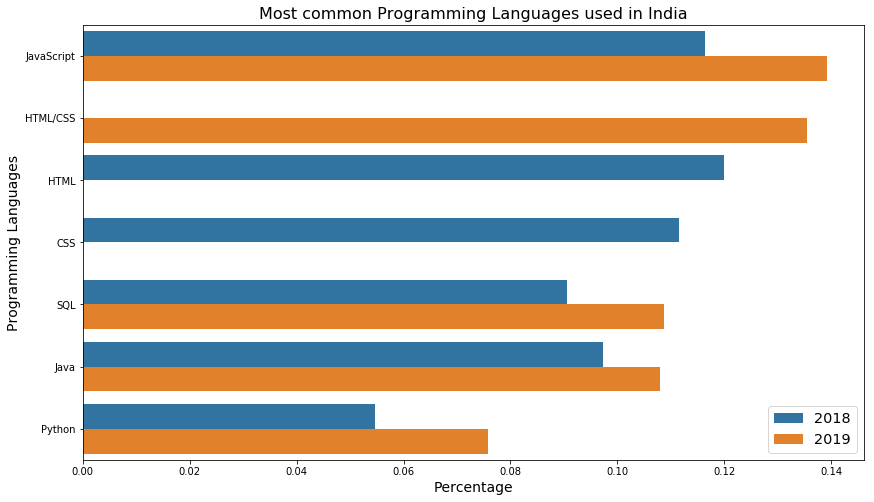

In [19]:
# Figure 1 — Percentage of use of programming languages among all the cited programming 
# languages by the respondents.

plt.figure(figsize=(14,8))
sns.barplot(x = 'Percentage', 
            y = 'Programming Language',
            hue = 'Year',
            data = worked_lang_chart.sort_values(by='Percentage', ascending=False))

plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Programming Languages", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='44')
plt.title('Most common Programming Languages used in India', size = 16)
plt.show()

We can see that classic languages like: **Java Script**, **SQL**, **Java** are still in the top positions. Stack Overflow 2018 survey data and Stack Overflow 2019 survey data

We don't have data for CSS in 2019 to compare. However we can see Python is more in demand and more used. Still Javascript tops the list.

## Part 2 — What are the most wanted programming languages in India?

C:\Users\LENOVO\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


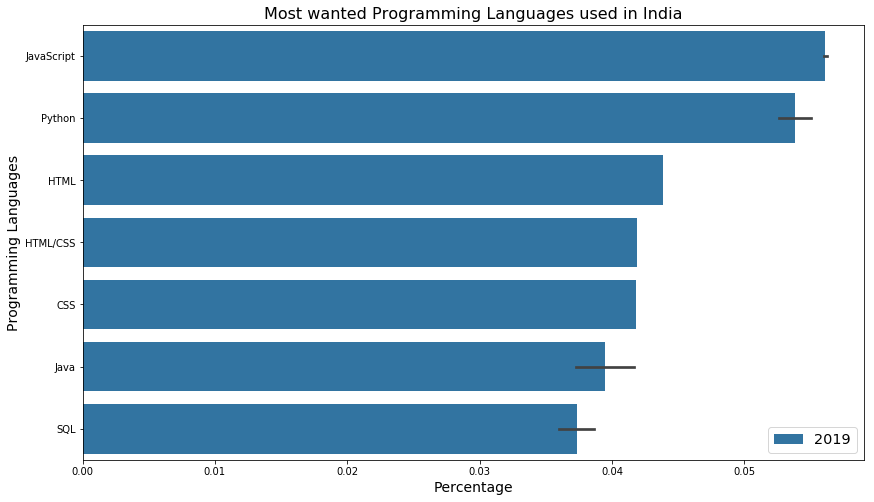

In [20]:
# Figure 2 — Percentage of desire of programming languages among all the cited programming 
# languages by the respondents.

plt.figure(figsize=(14,8))
sns.barplot(x = 'Percentage', 
            y = 'Programming Language',
            hue = 'Year',
            data = wanted_lang_chart.sort_values(by='Percentage', ascending=False))

plt.title('Most wanted Programming Languages used in India', size = 16)
plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("Programming Languages", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='44')
plt.show()

We can see that **Javascript** is still in top list of wanted languages. Python is gaining popularity

Most of the programming languages that have appeared as programming languages most used at work, also appeared in the ranking of most wanted programming languages, this show us that are many people wanting to learn these languages.

## Part 3 —How does programming languages used at work relates with programming languages people want to learn?

By looking at the raw data, we can spot some patterns such as for people that use python at work, for example, python is also cited as language that those people wanted to learn in the next year.

A natural question arise:

**“The pattern observed for python holds for the other languages?”**

To address this question, we built a heat map that indicate how the work programming languages ​​were related to the desired programming languages. The darker the position gets, the more related the programming language is.

In [21]:
# Grouping data to create a new dataframe

rows = []
for items in list(zip(worked_lang_2018, wanted_lang_2018)):
    for i in items[0]:
        rows.append({
            'Worked_PL': i, 
            'Wanted_PL': Counter(items[0])
        })
        
programming_language_transition = pd.DataFrame(rows).groupby('Worked_PL').agg({'Wanted_PL': 'sum'}).reset_index()

In [22]:
# Creating a matrix

for row in programming_language_transition['Worked_PL']:
    programming_language_transition[row] = 0

for index, row in programming_language_transition.iterrows():
    total = sum([value for key, value in dict(row['Wanted_PL']).items()])
    for key, value in dict(row['Wanted_PL']).items():
         programming_language_transition[key].loc[index] = (value / total)

C:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


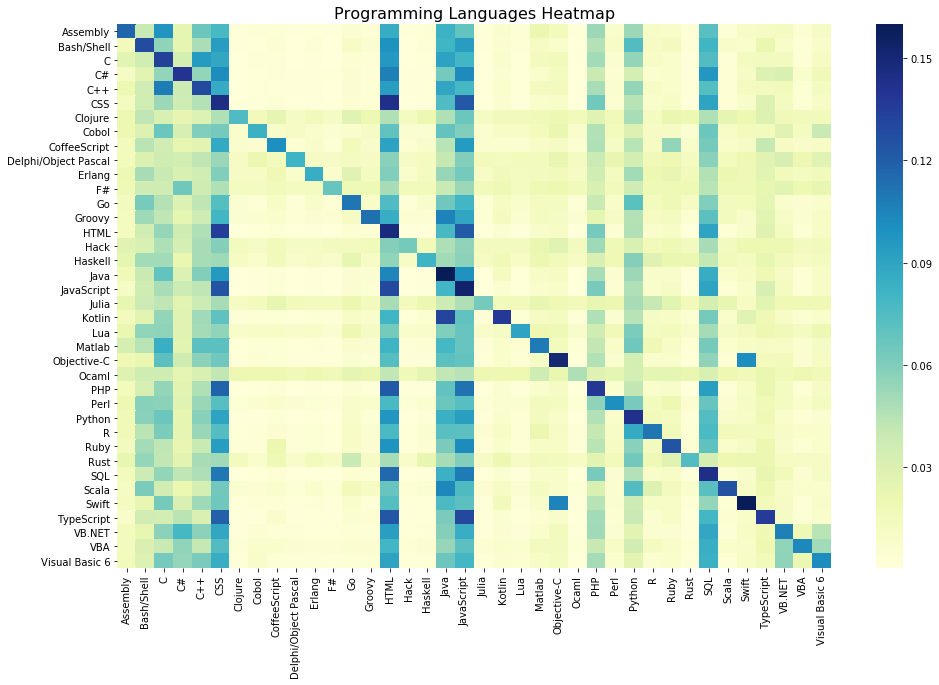

In [23]:
## Figure 3 — Percentage of relationship of work programming languages and desire programming 
## languages in 2018 and 2019.

matrix = programming_language_transition.drop('Wanted_PL', axis=1)\
                                        .set_index('Worked_PL')

plt.figure(figsize=(16, 10))
sns.heatmap(matrix, cmap="YlGnBu")
plt.title('Programming Languages Heatmap', size = 16)
plt.ylabel('')
plt.show()

With this figure we can have two insights:

1. As is evidenced by the diagonal line, people who already work with a programming language have a strong probability of wanting to learn the same programming language.

2. People who work with a programming language of a specific area, tend to want to learn programming languages of the same area. For example: **HTML** is strongly correlated with **CSS** and **JavaScript**.

## Part 4 —Which occupations are most popular in India??

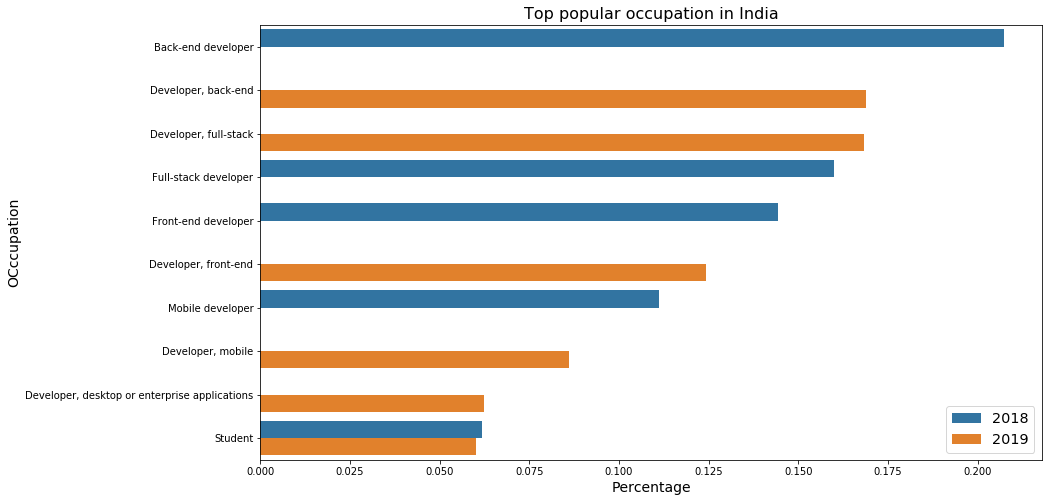

In [24]:
# Figure 4 — Percentage of occupation in India.


plt.figure(figsize=(14,8))
sns.barplot(x = 'Percentage', 
            y = 'Programming Language',
            hue = 'Year',
            data = occupation_chart.sort_values(by='Percentage', ascending=False))

plt.xlabel("Percentage", fontsize = 14)
plt.ylabel("OCccupation", fontsize = 14)
plt.legend(fontsize='x-large', title_fontsize='44')
plt.title('Top popular occupation in India', size = 16)
plt.show()

Back-end developer is the most popular occupation among participants in 2018.

Back-end developer, Full-stack web developer, Front end developer is the most popular occupation 
among participants in 2019.

Mobile developer is also popular occupation among participants in 2018, but it is slowing in 2019.

## Conclusion

In this article, we took a look at what were the most popular and most biased programming languages, according to Stackoverflow’s 2018 and 2019 Annual Developer Survey data.

1. We have seen that some older programming languages such as **JavaScript**, **SQL**, and **Java** still dominates. Python is in demand in 2019.
2. Learning trend is going on as per demand of these languages in India. It seems oldest languages still have their value and are being much demanded. 
3. People who already work with a certain programming language have a tendency to learn that language or related languages within correlated areas to improve their own skill.
4. Back-end developer, Full-stack web developer, Front end developer is the most popular occupation among participants after 2018.

To see more about this analysis, see the link to my medium post available [here](https://medium.com/@pks.priyanshu/write-a-data-science-blog-9d47098253d7).

## References

Stackoverflow Developer Survey Data: [https://insights.stackoverflow.com/survey](https://insights.stackoverflow.com/survey) <br>
Medium: https://medium.com/@pks.priyanshu/write-a-data-science-blog-9d47098253d7